In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [7]:
df.shape

(2200, 8)

In [8]:
df.duplicated().sum()

0

### Exploratory data analysis


In [9]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [10]:
df.rename(columns={'label':'crop'}, inplace=True)

In [11]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


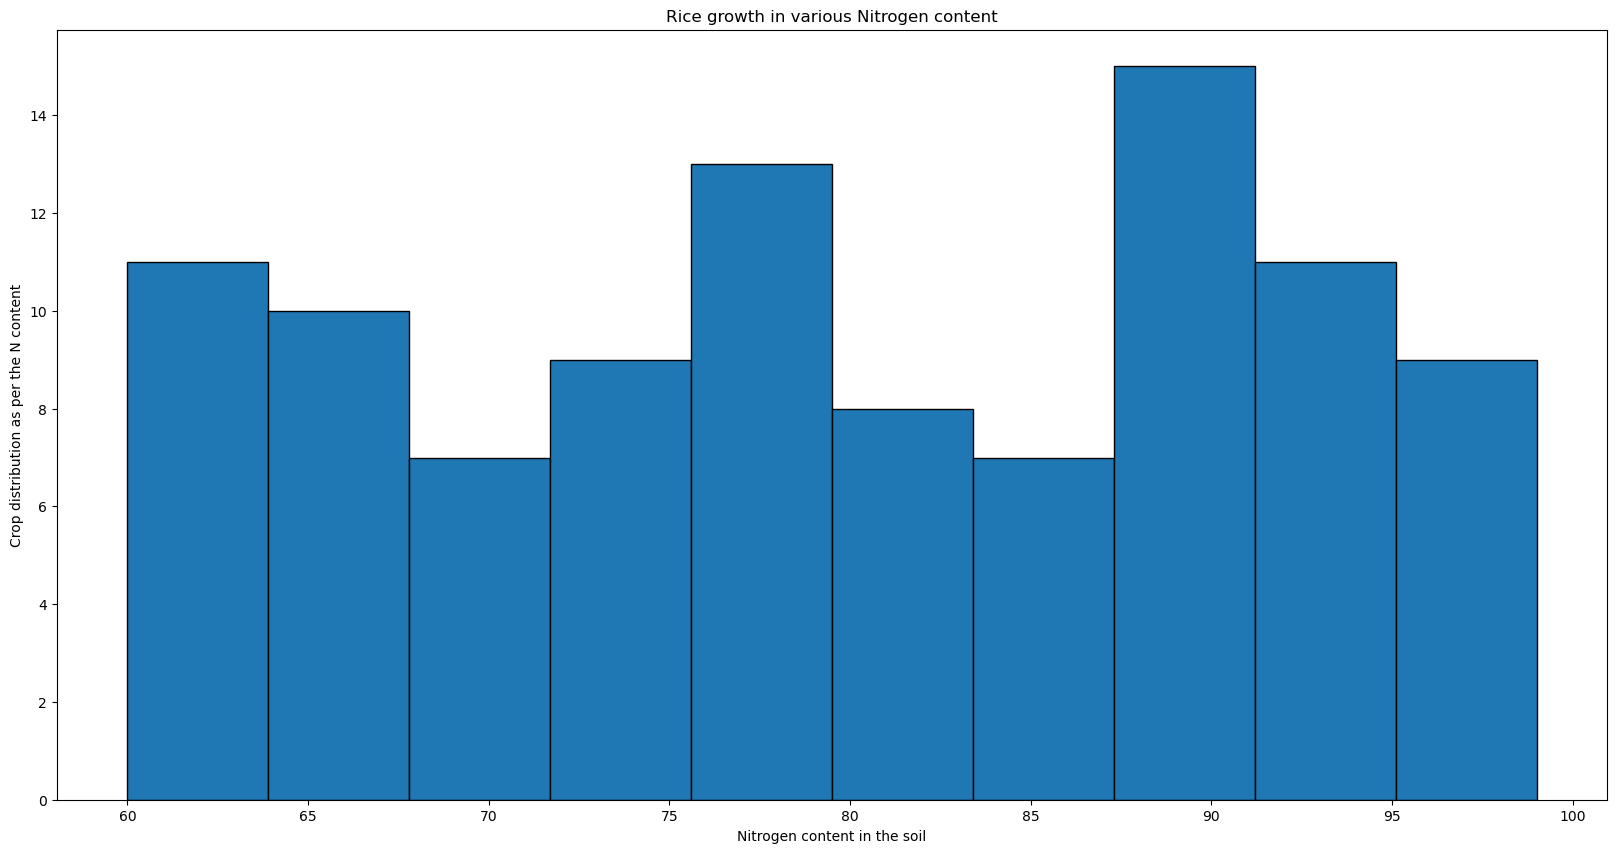

In [12]:
crop_df = df[df['crop']=='rice']
plt.figure(figsize=(20,10))
plt.hist(crop_df['N'],bins=10, edgecolor='black')
plt.xlabel('Nitrogen content in the soil')
plt.ylabel('Crop distribution as per the N content')
plt.title('Rice growth in various Nitrogen content')
plt.show()

From the visualization above, we can see that rice does well in a soil with high nitrogen content

In [13]:
df['crop'].unique()


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

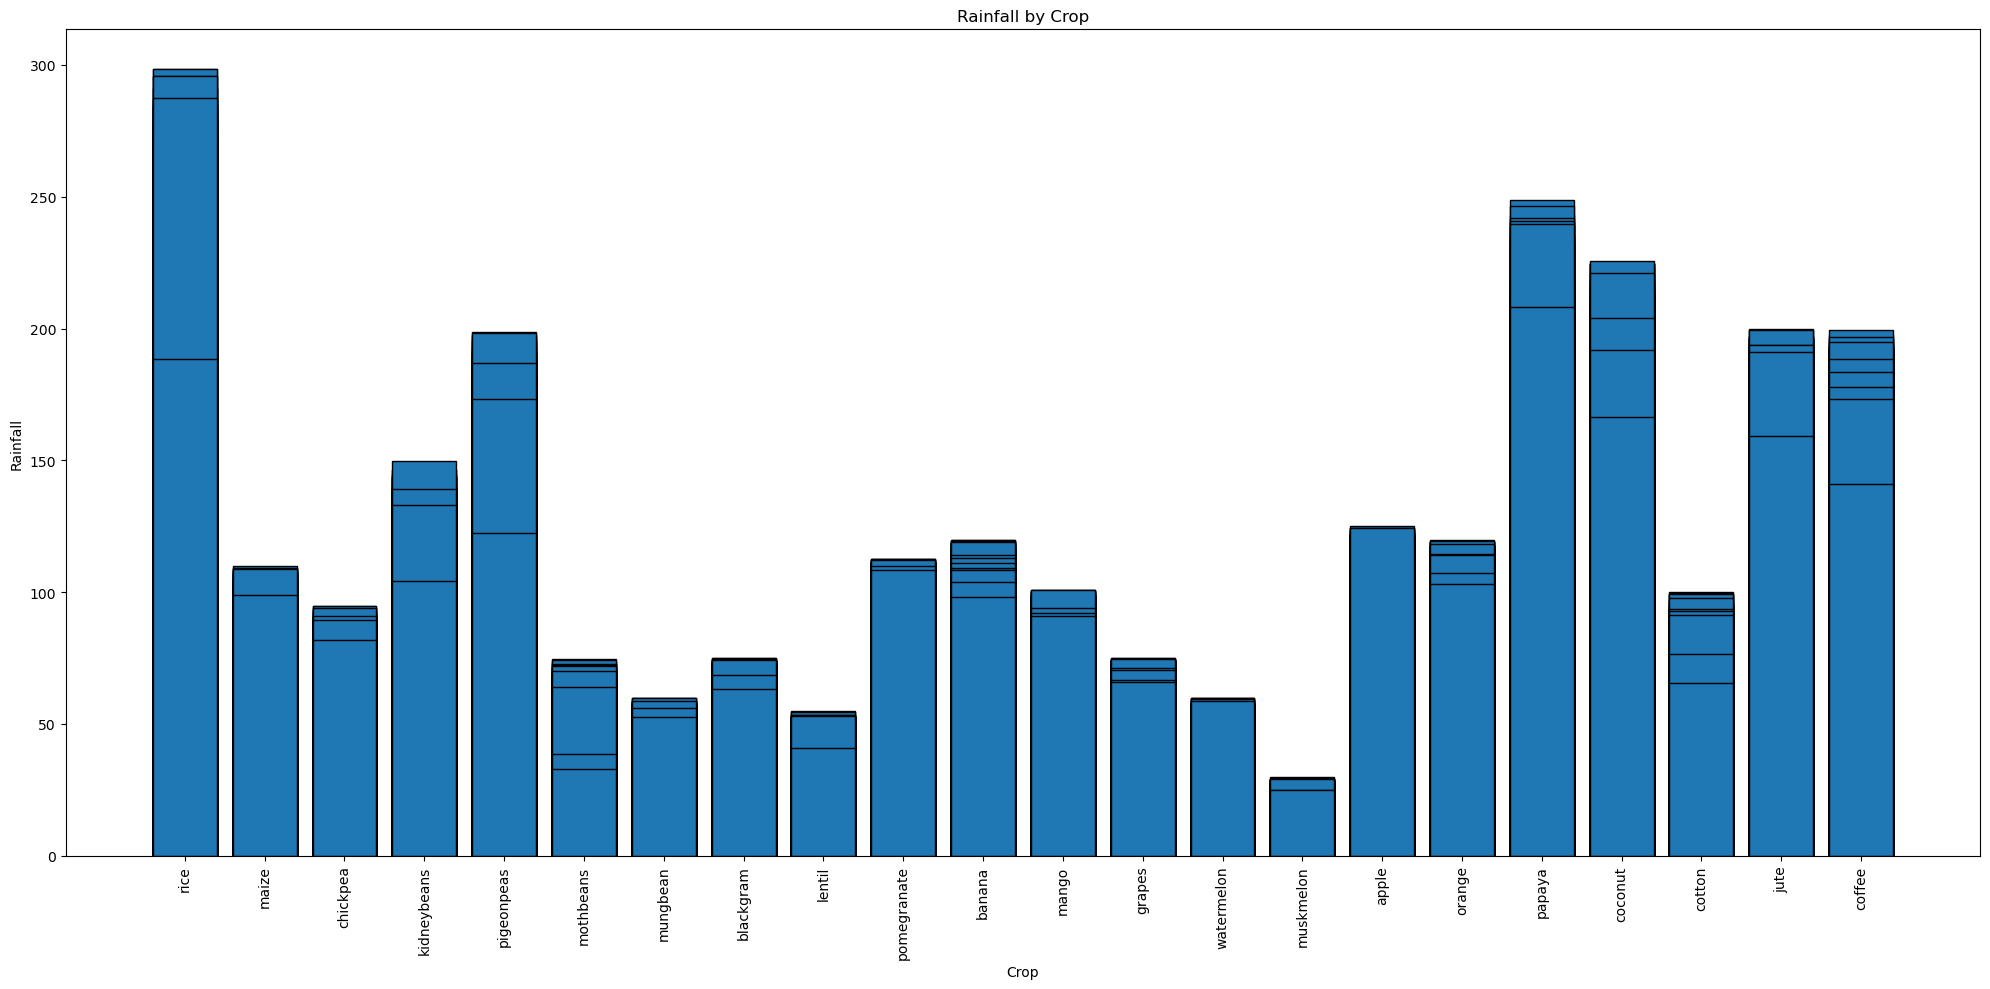

In [14]:
plt.figure(figsize=(20,10))
plt.bar(df['crop'], df['rainfall'], edgecolor='black')
plt.xlabel('Crop')
plt.ylabel('Rainfall')
plt.xticks(rotation=90)
plt.title('Rainfall by Crop')
plt.tight_layout()
plt.show()

From the visualization above;
1. Rice does more in areas with high rainfall followed closely by Papaya then Coconut.
2. Muskmelon does more in areas with low rainfall distribution


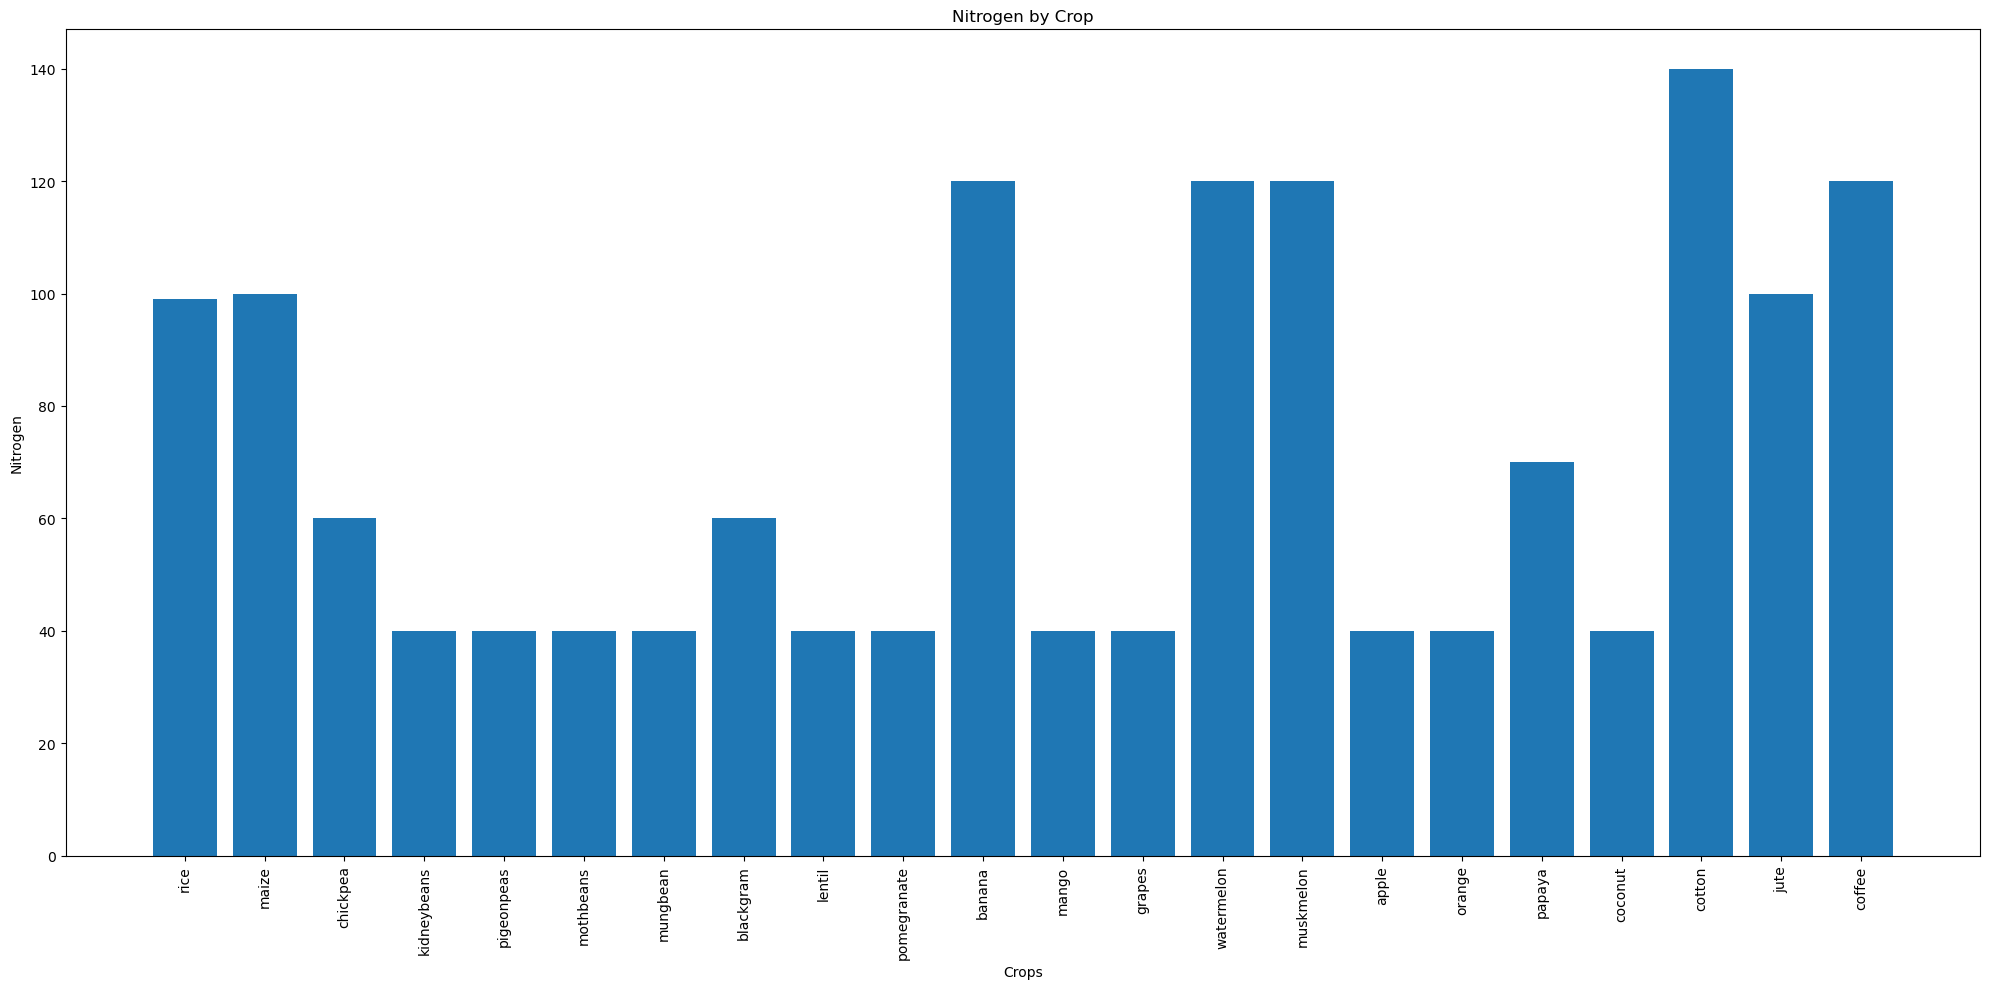

In [15]:
plt.figure(figsize=(20,10))
plt.bar(df['crop'], df['N'])
plt.xlabel('Crops')
plt.xticks(rotation=90)
plt.ylabel('Nitrogen')
plt.title('Nitrogen by Crop')
plt.tight_layout()
plt.show()

From the visualization;
1. Cotton does well in soil with high nitrogen composition followed by banana, muskmelon, watermelon and coffee.
2. Legumes, mango, grapes,apples,orange and coconut does well in soil with low nitrogen composition. 

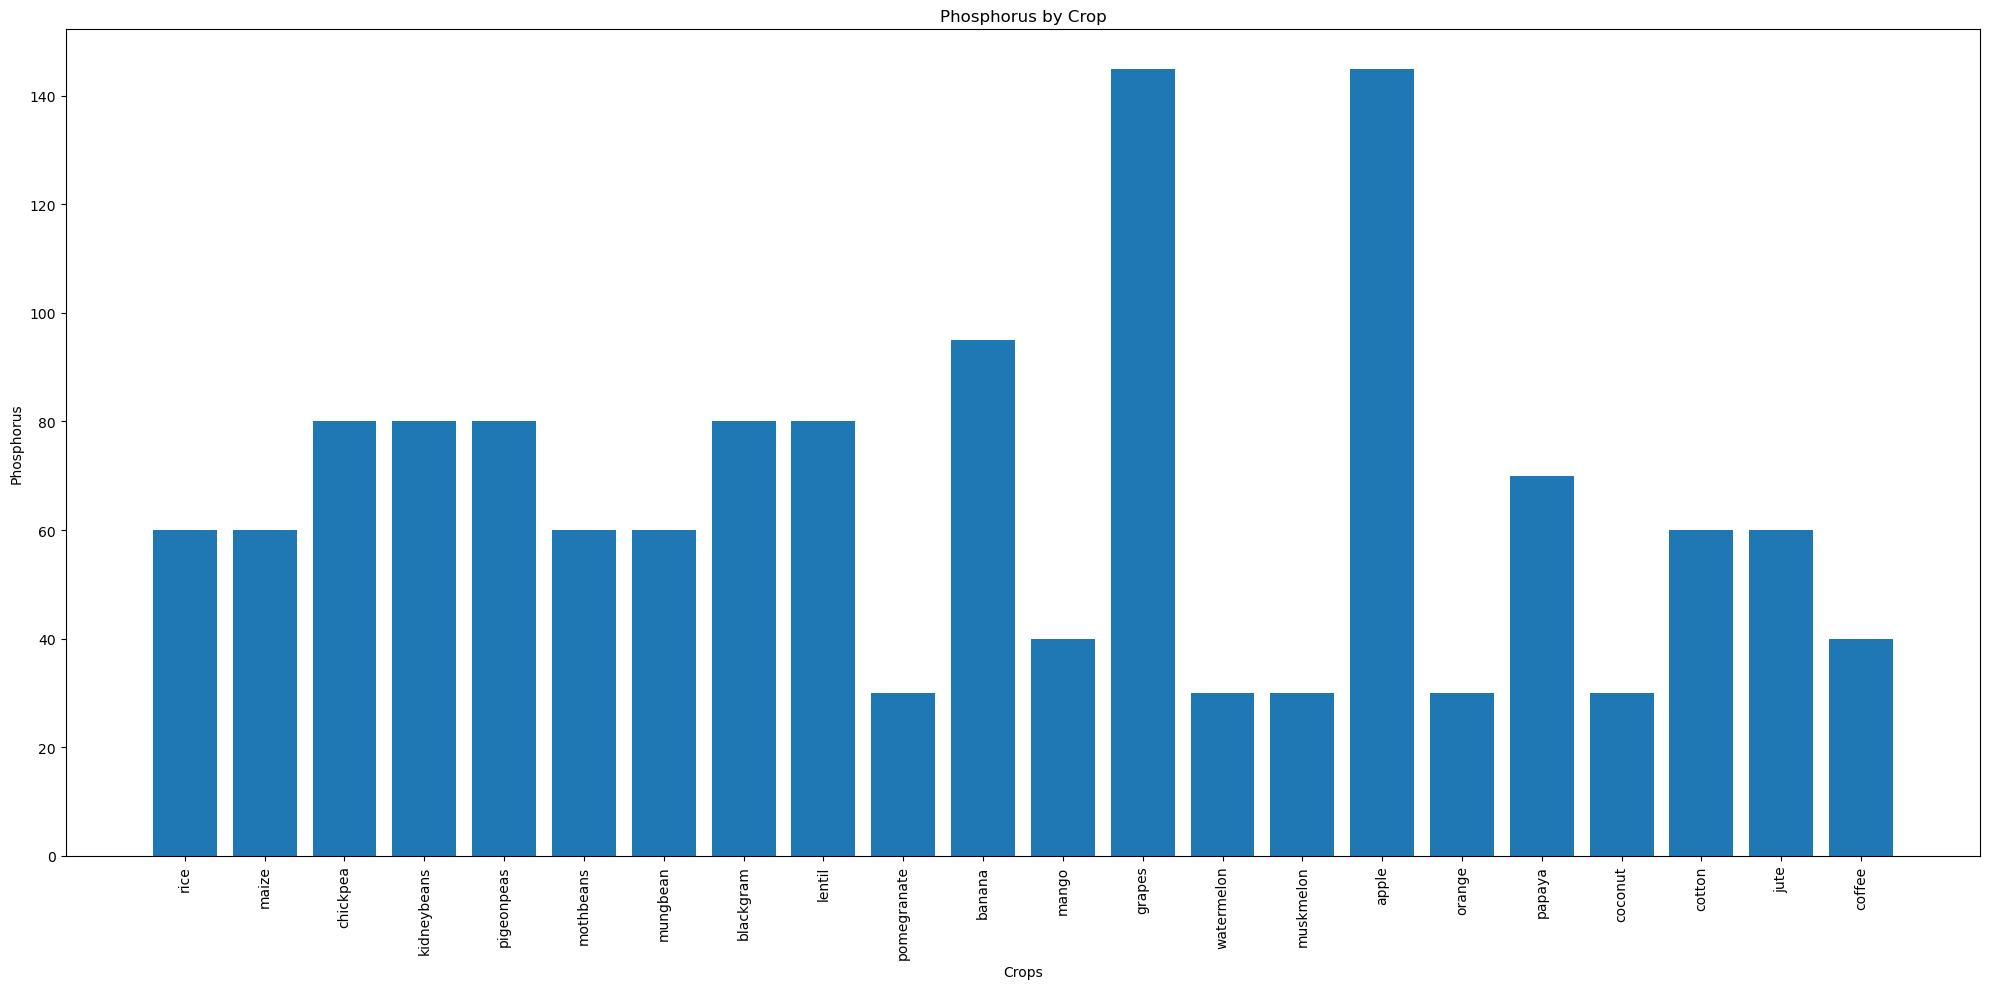

In [16]:
plt.figure(figsize=(20,10))
plt.bar(df['crop'], df['P'])
plt.xlabel('Crops')
plt.xticks(rotation=90)
plt.ylabel('Phosphorus')
plt.title('Phosphorus by Crop')
plt.tight_layout()
plt.show()

From the visualization;
1. Grapes and apples does more in soil with high phosphorus composition
2. Pomegranate, watermelon, muskmelon,orange,coconut does well even with low phosphorus composition. 

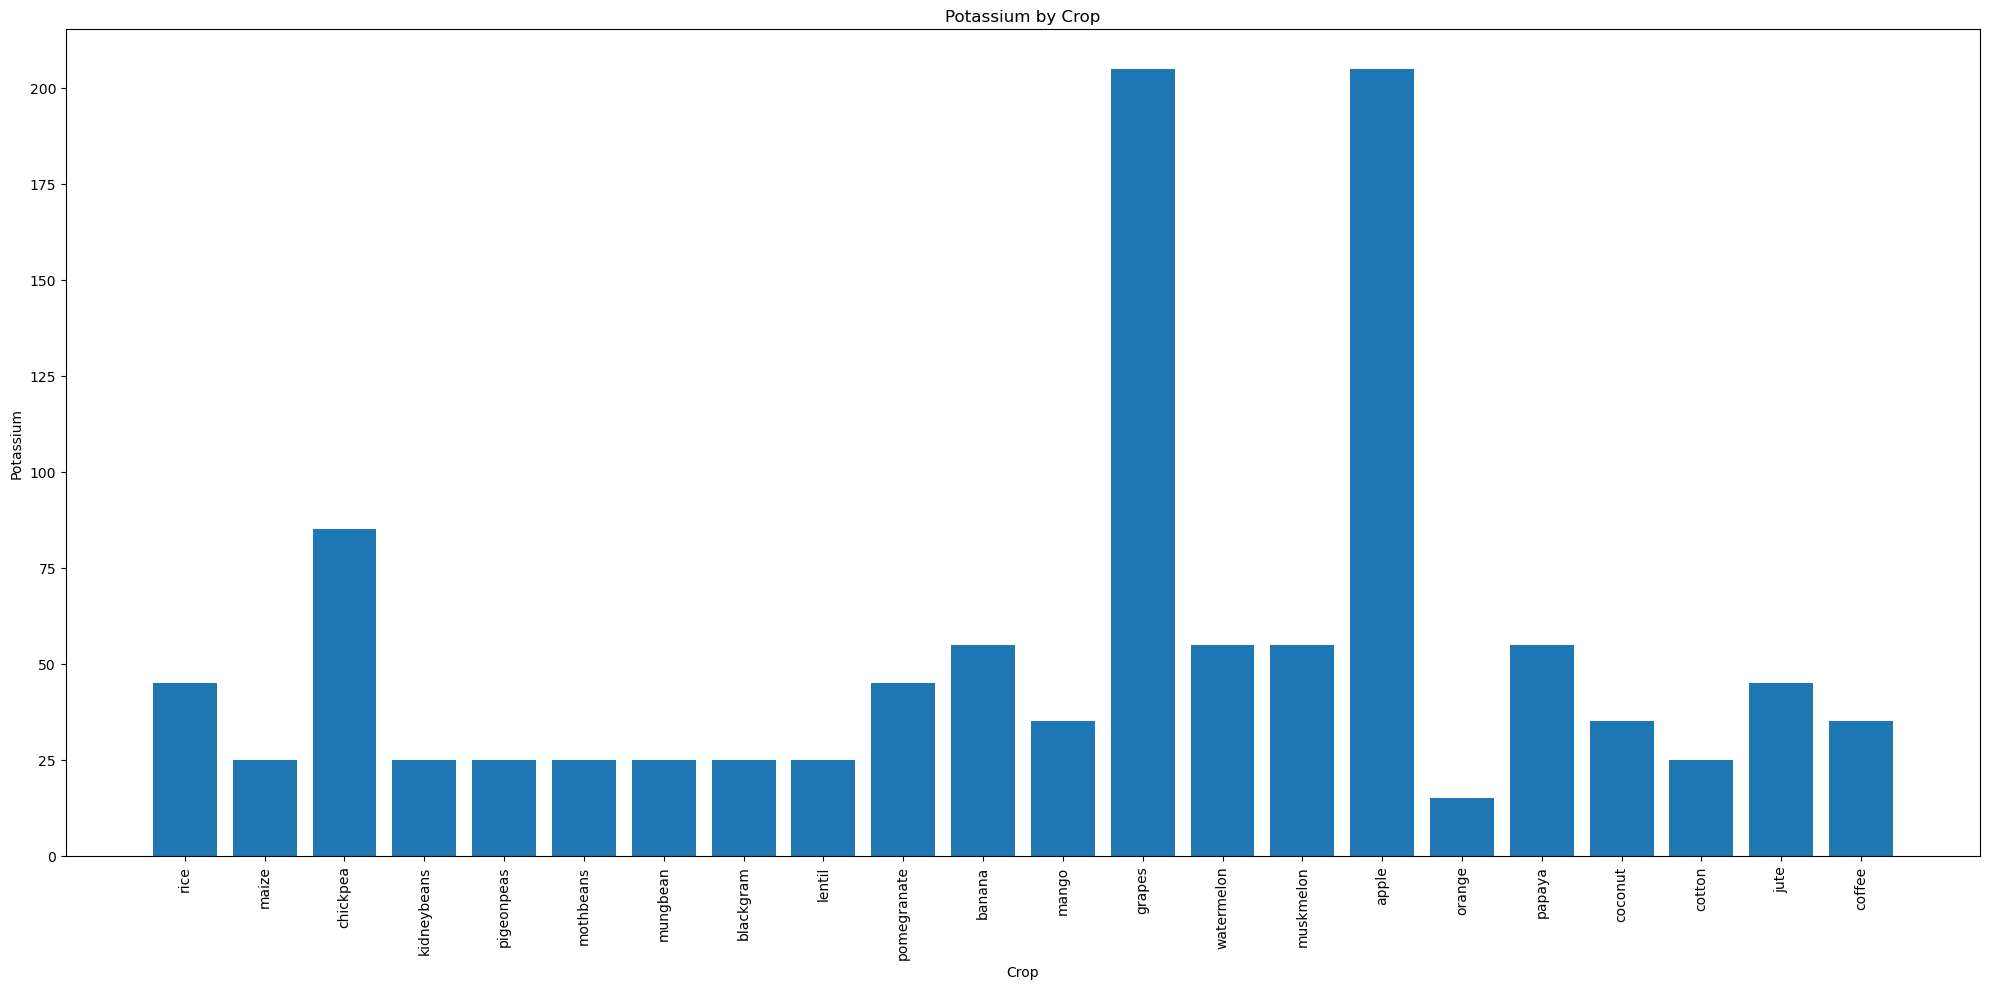

In [17]:
plt.figure(figsize=(20,10))
plt.bar(df['crop'], df['K'])
plt.xlabel('Crop')
plt.xticks(rotation=90)
plt.ylabel('Potassium')
plt.title('Potassium by Crop')
plt.tight_layout()

Grapes and apples need more of Potassium to do well while oranges does well in low potassium composition.

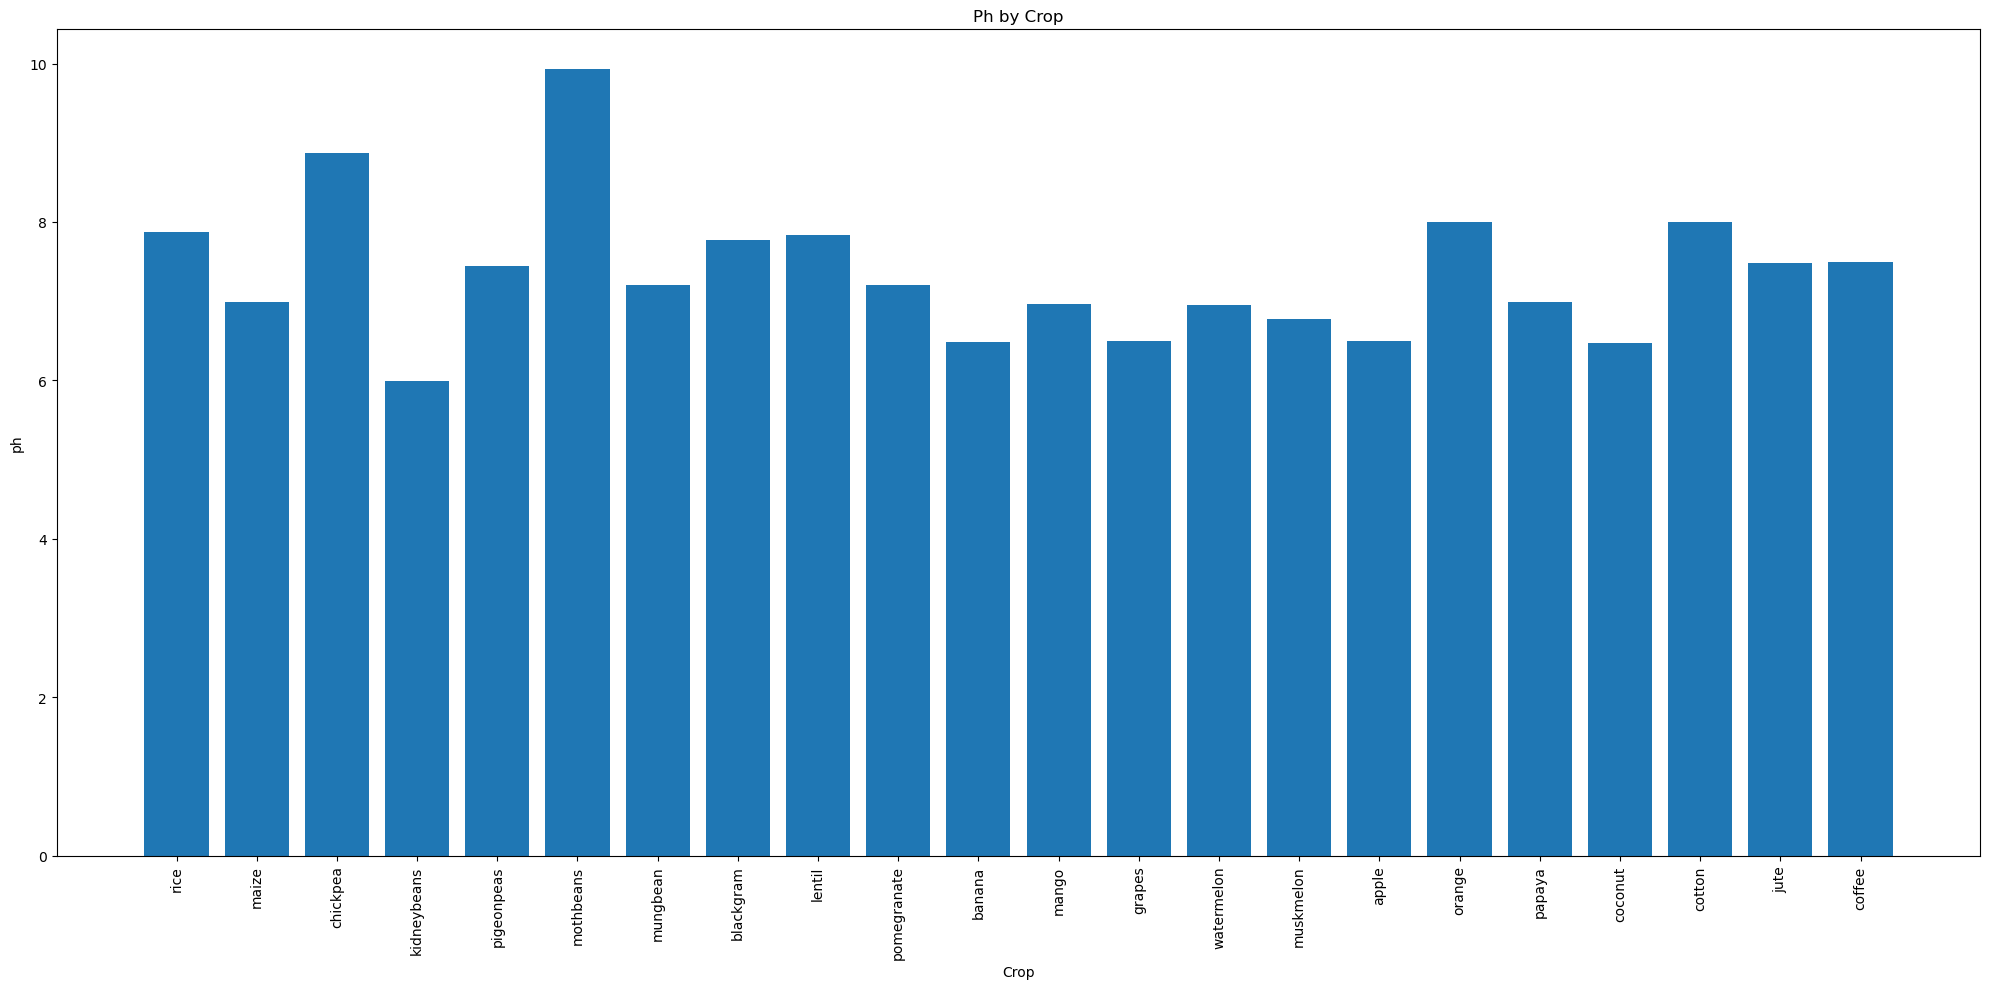

In [18]:
plt.figure(figsize=(20,10))
plt.bar(df['crop'], df['ph'])
plt.xlabel('Crop')
plt.xticks(rotation=90)
plt.ylabel('ph')
plt.title('Ph by Crop')
plt.tight_layout()

Mothpeas does well in soil with high ph followed closely by chickpeas. Kidneypeas does well with low ph.

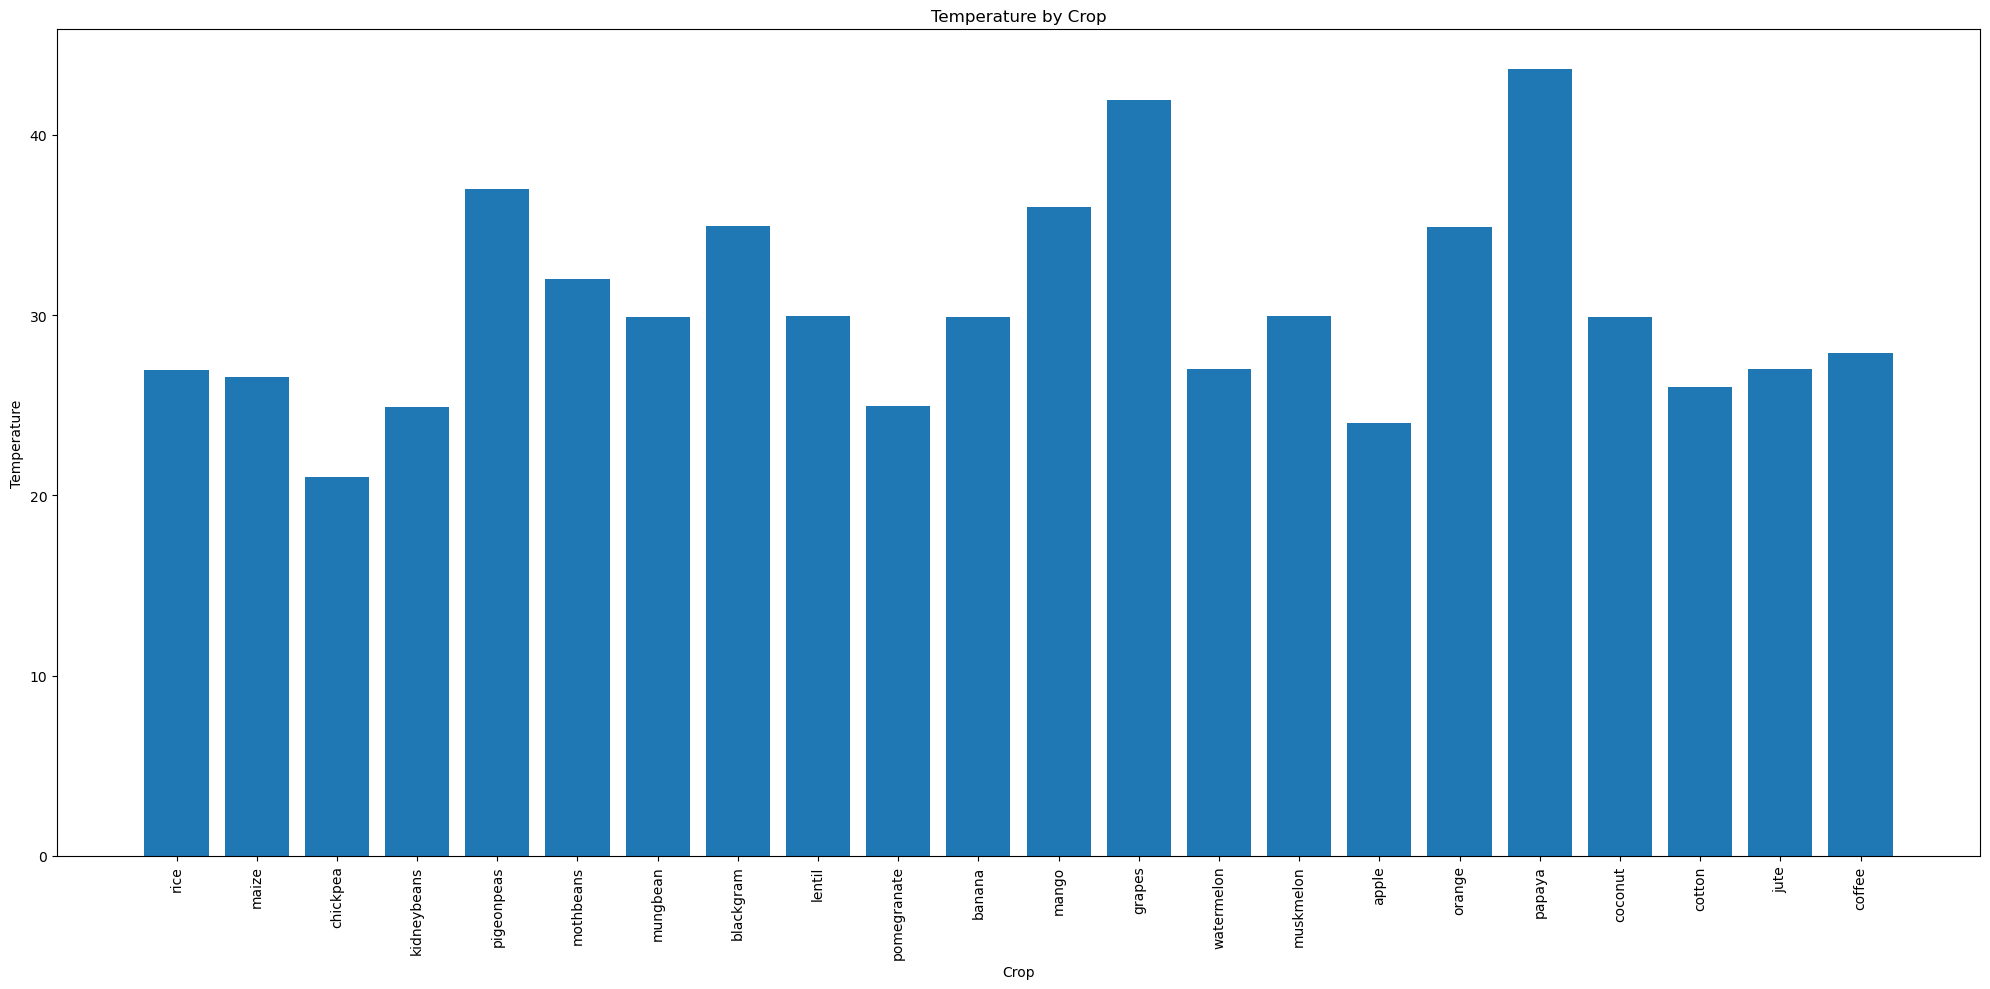

In [19]:
plt.figure(figsize=(20,10))
plt.bar(df['crop'], df['temperature'])
plt.xlabel('Crop')
plt.xticks(rotation=90)
plt.ylabel('Temperature')
plt.title('Temperature by Crop')
plt.tight_layout()

From the visualization above;
1. Papaya does well in areas with high temperatures, followed closely by grapes.
2. Chickpeas and pomegranate  need low temperature areas to grow.

C:\Users\hp\AppData\Local\Temp\ipykernel_7220\2581865190.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


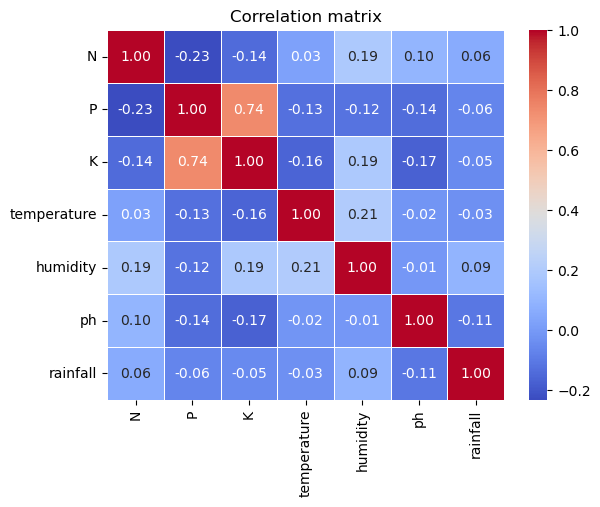

In [20]:
# Check the correlation between the predictor variables
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True, cmap= 'coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

From the heatmap, we can see that Phosphorus and Potassium are highly correlated.
Crops that does well in soil with high Potassium also does well in soil with high Phosphorus composition. 

### Feature Selection: Removing Highly Correlated Features

In the context of our data analysis and/or machine learning model development, we have identified that two features in our dataset exhibit a high degree of correlation. To optimize our model's performance and avoid multicollinearity issues, we have decided to remove one of these highly correlated features.

**Reason for Removal:**

Highly correlated features can introduce redundancy into our analysis or model, leading to instability and decreased interpretability. Moreover, they can cause multicollinearity, a situation where the independent variables are so interrelated that it becomes challenging to distinguish their individual effects on the target variable. This can result in unstable coefficients and reduced model performance.

By removing one of the correlated features, we aim to enhance the robustness and simplicity of our analysis or model, ultimately improving its accuracy and ease of interpretation.
.

In [21]:
def remove_highly_correlated_features(data, threshold=0.7):
  
    # Calculate the correlation matrix and take the absolute value
    corr_matrix = data.corr().abs()
    
    # Create a True/False mask to identify highly correlated features
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    tri_df = corr_matrix.mask(mask)
    
    # List column names of highly correlated features (r > threshold)
    to_drop = [c for c in tri_df.columns if any(tri_df[c] > threshold)]
    
    # Drop the highly correlated features from the DataFrame
    df_cleaned = data.drop(to_drop, axis=1)
    
    return df_cleaned

# Specify the DataFrame with the features
data = pd.DataFrame(df) 

# Remove highly correlated features
df_cleaned = remove_highly_correlated_features(data, threshold=0.7)

# Print the cleaned DataFrame
df_cleaned.head(10)

C:\Users\hp\AppData\Local\Temp\ipykernel_7220\2306971682.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr().abs()


,N,K,temperature,humidity,ph,rainfall,crop
0,90,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,38,23.223974,83.033227,6.336254,221.209196,rice


In [22]:
df = df_cleaned
df

,N,K,temperature,humidity,ph,rainfall,crop
0,90,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...
2195,107,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,34,26.272418,52.127394,6.758793,127.175293,coffee


### Outliers

In [23]:
cols = ['N','K','temperature','humidity','ph','rainfall']

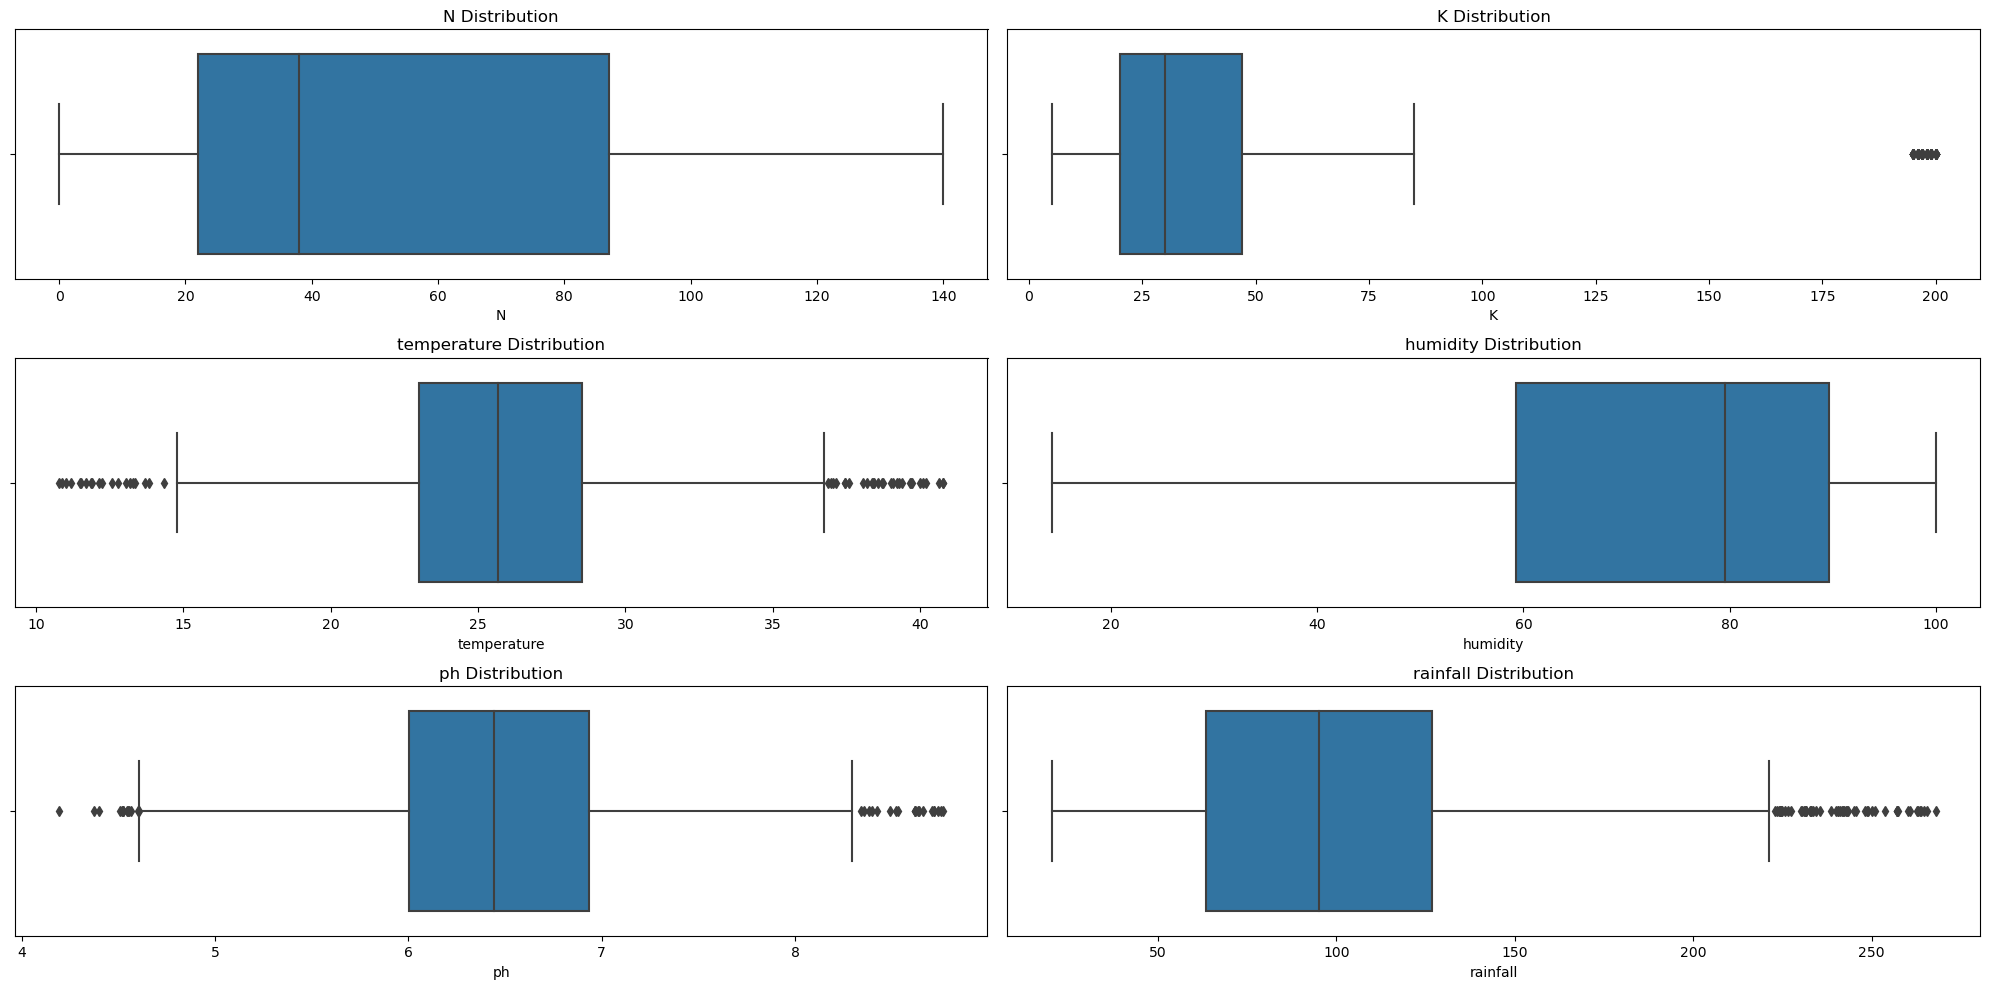

In [24]:
def remove_outliers(df, columns, threshold=3):
    
    df_cleaned = df.copy()  # Create a copy of the DataFrame
    
    for column in columns:
        z_scores = (df[column] - df[column].mean()) / df[column].std()  # Calculate Z-scores
        outliers = df_cleaned.loc[abs(z_scores) > threshold]  # Find outliers based on threshold
        df_cleaned = df_cleaned.drop(outliers.index)  # Remove outliers from the DataFrame
    
    return df_cleaned


# Specify the columns to remove outliers from
columns_to_remove_outliers = cols

# Remove outliers from the DataFrame
df_cleaned = remove_outliers(df, columns_to_remove_outliers)

# Plot box plots for the cleaned DataFrame
plt.figure(figsize=(20, 10))
for i, column in enumerate(columns_to_remove_outliers):
    plt.subplot(len(columns_to_remove_outliers)//2 + len(columns_to_remove_outliers)%2, 2, i+1)
    sns.boxplot(data=df_cleaned, x=column)
    plt.title(f"{column} Distribution")
plt.tight_layout()
plt.show()

Now that our data is free from outliers and has the correlated features removed, we have to standardize it ready for modeling.

In [25]:
df_cleaned

,N,K,temperature,humidity,ph,rainfall,crop
0,90,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...
2195,107,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,34,26.272418,52.127394,6.758793,127.175293,coffee


In [26]:
df_cleaned['crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [27]:
#df_cleaned.drop('crop',axis=1, inplace=True)

In [28]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the 'crop' column and transform it
df_cleaned['crop_encoded'] = label_encoder.fit_transform(df_cleaned['crop'])




In [29]:
df_cleaned

,N,K,temperature,humidity,ph,rainfall,crop,crop_encoded
0,90,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...
2195,107,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [30]:
#df_cleaned.drop(['crop','crop_encoded'], axis=1, inplace=True)

In [31]:
df_cleaned

,N,K,temperature,humidity,ph,rainfall,crop,crop_encoded
0,90,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...
2195,107,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [32]:
df_cleaned.drop('crop', axis=1)

,N,K,temperature,humidity,ph,rainfall,crop_encoded
0,90,43,20.879744,82.002744,6.502985,202.935536,20
1,85,41,21.770462,80.319644,7.038096,226.655537,20
2,60,44,23.004459,82.320763,7.840207,263.964248,20
3,74,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...
2195,107,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,34,26.272418,52.127394,6.758793,127.175293,5


### Define the predictors and target variables

In [33]:
X = df_cleaned.drop('crop_encoded', axis=1)
y = df_cleaned['crop_encoded']

In [34]:
cols = ['N','K','temperature','humidity','ph','rainfall']

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(X[cols])
df_normalized = pd.DataFrame(df_normalized, columns=cols)
df_normalized

,N,K,temperature,humidity,ph,rainfall
0,0.642857,0.194872,0.336407,0.790267,0.505101,0.737490
1,0.607143,0.184615,0.366095,0.770633,0.622118,0.833226
2,0.428571,0.200000,0.407226,0.793977,0.797522,0.983807
3,0.528571,0.179487,0.523440,0.768751,0.609501,0.898645
4,0.557143,0.189744,0.311423,0.785626,0.751220,0.978775
...,...,...,...,...,...,...
2024,0.764286,0.138462,0.532891,0.608410,0.565692,0.635938
2025,0.707143,0.112821,0.554305,0.494359,0.414117,0.434740
2026,0.842857,0.128205,0.444802,0.617880,0.474404,0.617971
2027,0.835714,0.148718,0.516151,0.441760,0.561040,0.431716


Check for class imbalance

In [36]:
df_cleaned['crop_encoded'].value_counts()

12    100
19    100
8     100
6     100
4     100
15    100
21    100
11    100
1     100
5     100
10    100
2     100
14    100
18    100
9     100
3      97
16     96
17     83
20     78
13     73
0      57
7      45
Name: crop_encoded, dtype: int64

### Perform train_test split on the data

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_normalized,y, test_size=0.3, random_state=1)

### Treat the class imbalance problem that the data had using SMOTE technique

In [40]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_train_resampled,y_train_resampled = sm.fit_resample(X_train, y_train)

Having prepared our data, we now go for modeling.

## Modeling

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

1. Baseline Model

In [42]:
# instantiate the Logistic regression algorithm
lr = LogisticRegression(random_state=2)
#fit the model
lr_model = lr.fit(X_train_resampled, y_train_resampled)
#make predictions on the training and test data
y_train_pred = lr_model.predict(X_train_resampled)
y_test_pred = lr_model.predict(X_test)

In [43]:
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
print('Accuracy_score_train:', accuracy_train)
accuracy_test= accuracy_score(y_test, y_test_pred)
print('Accuracy_test_score:',accuracy_test)
precision = precision_score(y_test, y_test_pred, average='weighted')
print('Precision:',precision)
recall = recall_score(y_test, y_test_pred,average='weighted')
print('Recall:',recall)
f1score = f1_score(y_test, y_test_pred,average='weighted')
print('F1_Score:',f1score)

Accuracy_score_train: 0.8912776412776413
Accuracy_test_score: 0.8719211822660099
Precision: 0.8882845382608722
Recall: 0.8719211822660099
F1_Score: 0.8681920422757299


#### Lets find the Log loss for the model

In [44]:
y_pred_proba = lr.predict_proba(X_test)
logloss = log_loss(y_test,y_pred_proba)
print('Log loss:',logloss)

Log loss: 1.0373793335437698


#### Confusion matrix for the model

In [45]:
confmatrix1 = confusion_matrix(y_test, y_test_pred)
#print(confmatrix1)

What are the important features in the model above

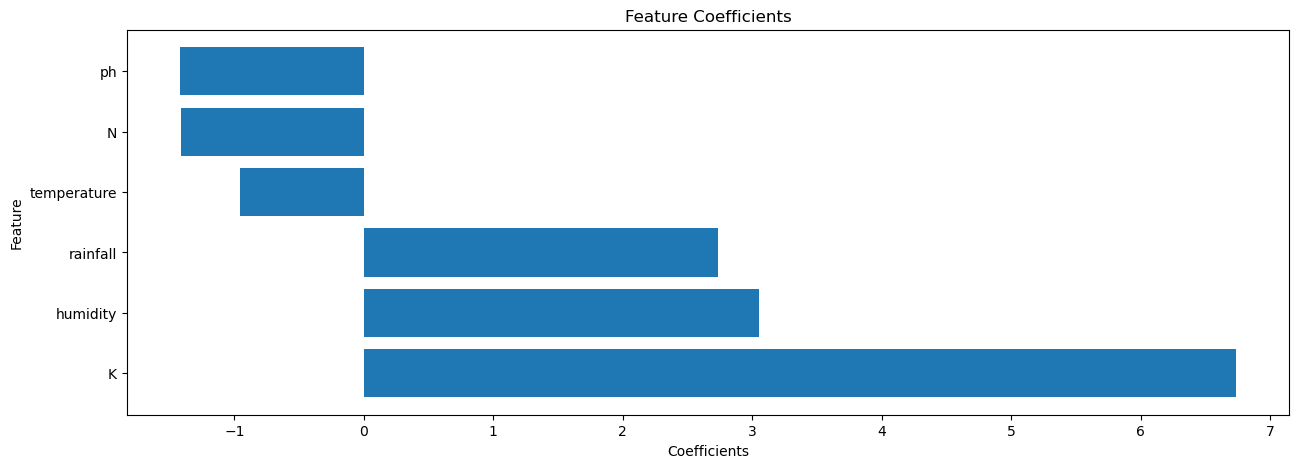

In [46]:
coefficients = lr.coef_[0]
feature_coeff = pd.DataFrame({'Feature':X_train_resampled.columns,'Coefficient':coefficients})
feature_coeff = feature_coeff.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(15,5))
plt.barh(feature_coeff['Feature'],feature_coeff['Coefficient'])
plt.xlabel('Coefficients')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()

#### The second model; Decision tree

In [47]:
Dctc = DecisionTreeClassifier()
model2 = Dctc.fit(X_train_resampled, y_train_resampled)
# make predictions on the test and training data
y_train_pred2 = model2.predict(X_train_resampled)
y_test_pred2 = model2.predict(X_test)

##### Subject the model into various performance metrics to determine its performance

In [48]:
accuracy_train = accuracy_score(y_train_resampled, y_train_pred2)
print('Accuracy train:', accuracy_train)
accuracy_test = accuracy_score(y_test, y_test_pred2)
print('Accuracy test:',accuracy_test)
precision2 = precision_score(y_test, y_test_pred2, average='weighted')
print('Precision:',precision)
recall2 = recall_score(y_test, y_test_pred2,average='weighted')
print('Recall:',recall2)
f1score2 = f1_score(y_test, y_test_pred2, average='weighted')
print('F1_score:',f1score2)

Accuracy train: 1.0
Accuracy test: 0.9835796387520526
Precision: 0.8882845382608722
Recall: 0.9835796387520526
F1_score: 0.983552237177712


#### what is the log loss?

In [49]:
y_pred_proba = model2.predict_proba(X_test)
logloss = log_loss(y_test,y_pred_proba)
print('Log loss:',logloss)

Log loss: 0.5918498093451141


Determine the important features in the model

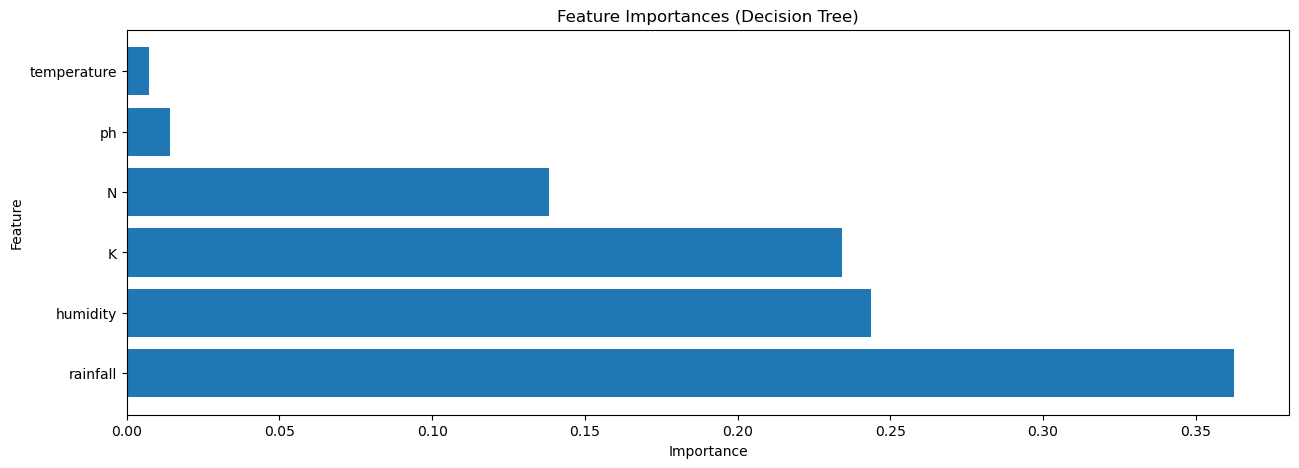

In [50]:
# Access feature importances
feature_importances = model2.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a horizontal bar plot to visualize feature importances
plt.figure(figsize=(15, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Decision Tree)')
plt.show()

### Third model; KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
#Instantiate the model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
#fit the model
knn_model = knn_classifier.fit(X_train_resampled, y_train_resampled)
# make predictions based on the test and training data
y_train_pred3 = knn_model.predict(X_train_resampled)
y_test_pred3 = knn_model.predict(X_test)

Determine the model performance

In [52]:
#check the accuracy
#on training data
accuracy_train = accuracy_score(y_train_resampled, y_train_pred3)
print("Accuracy on training data:",accuracy_train)
accuracy_test = accuracy_score(y_test,y_test_pred3)
print("Accuracy on test data:",accuracy_test)
precision= precision_score(y_test, y_test_pred3, average='weighted')
print('Precision:',precision)
recall = recall_score(y_test, y_test_pred3,average='weighted')
print('Recall:',recall)
f1score = f1_score(y_test, y_test_pred3, average='weighted')
print('F1_score:',f1score)

Accuracy on training data: 0.9797297297297297
Accuracy on test data: 0.9605911330049262
Precision: 0.9630161307064354
Recall: 0.9605911330049262
F1_score: 0.9603994648780915


Determine the log loss of the model

In [53]:
y_pred_proba = knn_model.predict_proba(X_test)
logloss = log_loss(y_test,y_pred_proba)
print("Logloss:",logloss)

Logloss: 0.423395813774904


#### Fourth Model;Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
#instatiate the algorithm
rf_classifier = RandomForestClassifier(random_state=23)
#fit the model on training data
rf_model = rf_classifier.fit(X_train_resampled,y_train_resampled)
#make predictions on training and test data
y_train_pred = rf_model.predict(X_train_resampled)
y_test_pred = rf_model.predict(X_test)

What is the performance of the model

In [55]:
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
print("Accuracy on training data:",accuracy_train)
accuracy_test = accuracy_score(y_test,y_test_pred)
print("Accuracy on test data:",accuracy_test)
precision= precision_score(y_test, y_test_pred, average='weighted')
print('Precision:',precision)
recall = recall_score(y_test, y_test_pred,average='weighted')
print('Recall:',recall)
f1score = f1_score(y_test, y_test_pred, average='weighted')
print('F1_score:',f1score)

Accuracy on training data: 1.0
Accuracy on test data: 0.993431855500821
Precision: 0.9935040484683767
Recall: 0.993431855500821
F1_score: 0.993400451039211


What is its log loss?

In [56]:
y_pred_proba = rf_model.predict_proba(X_test)
log_loss = log_loss(y_test, y_pred_proba)
print("Log loss:",log_loss)

Log loss: 0.06956408711971665


What are the important features?

Text(0.5, 1.0, 'Feature Importances')

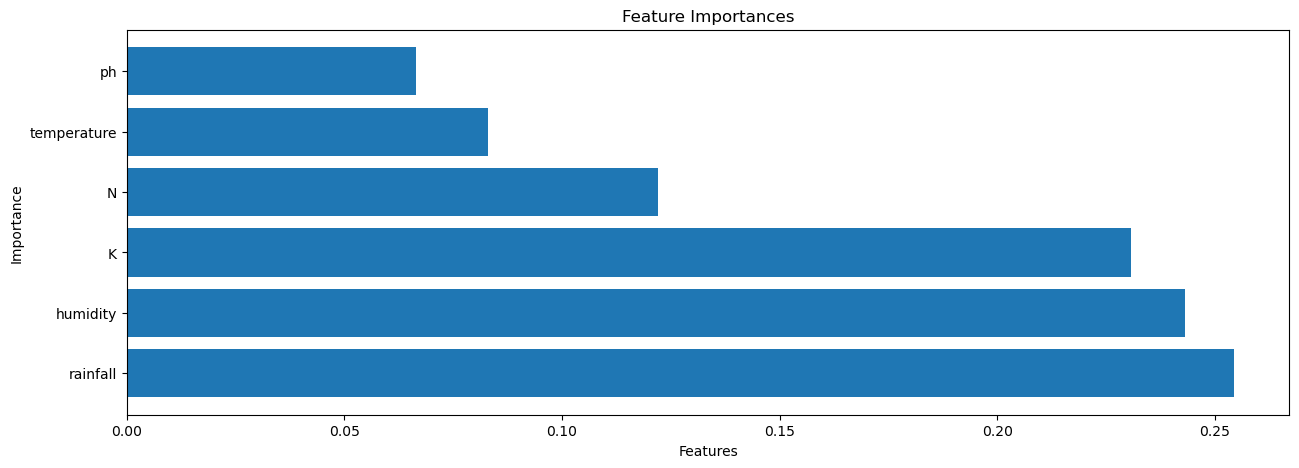

In [57]:
feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({"Features":X_train_resampled.columns,"Importance":feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(15,5))
plt.barh(feature_importance_df['Features'], feature_importance_df['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")

From the above models, we see that Random frorest classifier model performs best and with lower Log loss. We will then hypertune it to make it better performing and reduce overfitting. 

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=23)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,  # Number of cross-validation folds
                           scoring='accuracy',  # Use an appropriate scoring metric for classification
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to your training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Make predictions on new data
y_train_pred = best_rf_classifier.predict(X_train_resampled)
y_test_pred = best_rf_classifier.predict(X_test)


c:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [59]:
best_rf_classifier

RandomForestClassifier(max_features='auto', min_samples_split=5,
                       n_estimators=300, random_state=23)

In [60]:
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
print("Accuracy on training data:",accuracy_train)
accuracy_test = accuracy_score(y_test,y_test_pred)
print("Accuracy on test data:",accuracy_test)
precision= precision_score(y_test, y_test_pred, average='weighted')
print('Precision:',precision)
recall = recall_score(y_test, y_test_pred,average='weighted')
print('Recall:',recall)
f1score = f1_score(y_test, y_test_pred, average='weighted')
print('F1_score:',f1score)

Accuracy on training data: 0.9993857493857494
Accuracy on test data: 0.9950738916256158
Precision: 0.9951221868057567
Recall: 0.9950738916256158
F1_score: 0.995067900780716


In [66]:
y_pred_proba = best_rf_classifier.predict_proba(X_test)

# Calculate the log loss
logloss = log_loss(y_test, y_pred_proba)

# Print the log loss
print("Log loss:", logloss)

Log loss: 0.07336424151283173


In [61]:
rf_classifier = RandomForestClassifier(max_features='auto', min_samples_split=5,
                       n_estimators=300, random_state=23)
#fit the model on training data
rf_model2 = rf_classifier.fit(X_train_resampled,y_train_resampled)
#make predictions on training and test data
y_train_pred = rf_model2.predict(X_train_resampled)
y_test_pred = rf_model2.predict(X_test)

c:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [62]:
y_pred_proba22 = rf_model2.predict_proba(X_test)

In [63]:
from sklearn.metrics import log_loss
logloss_value = log_loss(y_test, y_pred_proba22)


In [65]:
y_pred_proba = rf_model2.predict_proba(X_test)

# Calculate the log loss
logloss = log_loss(y_test, y_pred_proba)

# Print the log loss
print("Log loss:", logloss)

Log loss: 0.07336424151283173


Now that we have reduced oversampling in Random forest classifier algorithm, we will save the model.

We are going to pickle it.

In [68]:
import pickle
model_filename = 'best_rf_classifier.pkl'
with open(model_filename,'wb') as file:
   pickle.dump(best_rf_classifier, file)